<a href="https://colab.research.google.com/github/ShauryaDusht/machine-learning-basics/blob/main/LAB7_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

```
Aim : Perform logistic regression with inbuilt and without inbuilt function for
binary classfication. Also extend the code for multiclass classification using
softmax function
```

## Binary Logistic Regression

### Making Synthetic Data

In [ ]:
import pandas as pd

import random

def generate_synthetic_data(num_rows=40):
    data = []

    for _ in range(num_rows):
        x1 = random.uniform(1, 8)
        x2 = random.uniform(1, 8)
        label = 0 if (x1 < 4 and x2 < 4) or (x1 > 5 and x2 < 5) else 1
        data.append([x1, x2, label])

    return data

data = generate_synthetic_data(40)

columns = ['x1', 'x2', 'y']

df = pd.DataFrame(data, columns=columns)

df.head()

,x1,x2,y
0,1.383347,6.543887,1
1,6.509985,6.341372,1
2,6.507020,5.250797,1
3,7.608276,7.032724,1
4,3.306733,5.145595,1


### With Inbuilt Function

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = df[['x1','x2']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr_model = LogisticRegression(max_iter=20)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         7

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12


Confusion Matrix:
[[5 0]
 [0 7]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


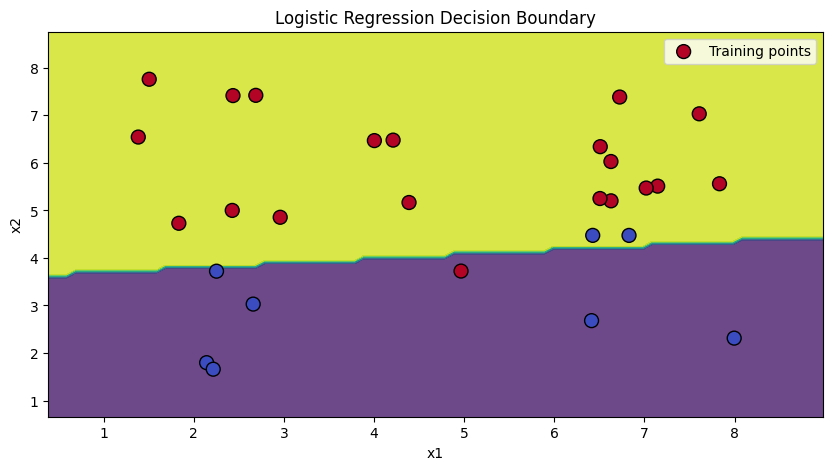

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

x_min, x_max = X_train['x1'].min() - 1, X_train['x1'].max() + 1
y_min, y_max = X_train['x2'].min() - 1, X_train['x2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = lr_model.predict(np.c_[xx.ravel(), yy.ravel()]) # ravel -> makes a linear array
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.8)
ax.scatter(X_train['x1'], X_train['x2'], c=y_train, edgecolors='k', marker='o', s=100, cmap='coolwarm', label='Training points')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Logistic Regression Decision Boundary')

plt.legend()
plt.show()

### Without using Inbuilt Function

#### Util Functions

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def diff_sigmoid(z):
    y = sigmoid(z)
    return y * (1 - y)

def compute_loss(y, y_pred):
    m = len(y)
    loss = - (1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return loss

def gradient_descent(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)
    loss_history = []

    for _ in range(epochs):
        y_pred = sigmoid(np.dot(X, theta))
        gradient = (1/m) * np.dot(X.T, (y_pred - y))

        theta -= lr * gradient

        loss = compute_loss(y, y_pred)
        loss_history.append(loss)
    return theta, loss_history

def predict(X, theta):
    y_pred = sigmoid(np.dot(X, theta))
    return [1 if i >= 0.5 else 0 for i in y_pred]

#### Confusion Matrix Calculation

In [ ]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def confusion_matrix_manual(y_true, y_pred):
    tp, tn, fp, fn = 0, 0, 0, 0
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            tp += 1
        elif y_true[i] == 0 and y_pred[i] == 0:
            tn += 1
        elif y_true[i] == 0 and y_pred[i] == 1:
            fp += 1
        elif y_true[i] == 1 and y_pred[i] == 0:
            fn += 1
    print(f"tp={tp} fp={fp} fn={fn} tn={tn}\n")
    return np.array([[tp, fp], [fn, tn]])

def classification_report_manual(y_true, y_pred):
    res = confusion_matrix_manual(y_true, y_pred)

    tp, fp, fn, tn = res[0][0], res[0][1], res[1][0], res[1][1]

    acc = accuracy(y_true, y_pred)

    precision = tp / (tp + fp) if tp + fp != 0 else 0

    recall = tp / (tp + fn) if tp + fn != 0 else 0

    f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall != 0 else 0

    return f"Accuracy: {acc:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1-Score: {f1_score:.4f}"

#### Main Function

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Preparing the data
df = pd.DataFrame(data, columns=columns)
X = df[['x1', 'x2']]
y = df['y'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

theta, loss_history = gradient_descent(X_train, y_train, lr=0.1, epochs=3000)

y_pred = predict(X_test, theta)

#### Plotting True and Predicted values

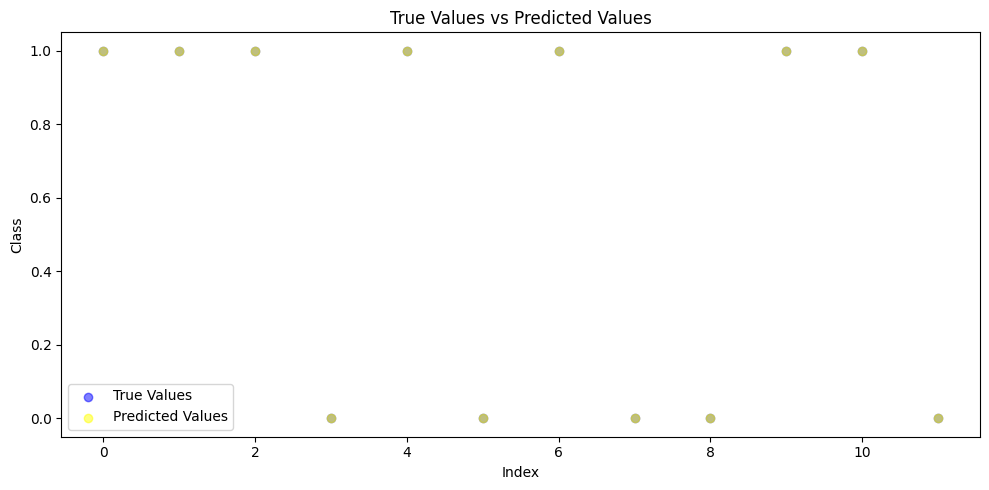

In [ ]:
import matplotlib.pyplot as plt

# plot y_pred and y_true values
plt.figure(figsize=(10, 5))

plt.scatter(range(len(y_test)), y_test, color='blue', label='True Values', alpha=0.5)
plt.scatter(range(len(y_pred)), y_pred, color='yellow', label='Predicted Values', alpha=0.5)
plt.title('True Values vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Class')
plt.legend()

plt.tight_layout()
plt.show()

#### Results

Accuracy: 1.0

Classification Report:
tp=7 fp=0 fn=0 tn=5

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Confusion Matrix:
tp=7 fp=0 fn=0 tn=5

[[7 0]
 [0 5]]


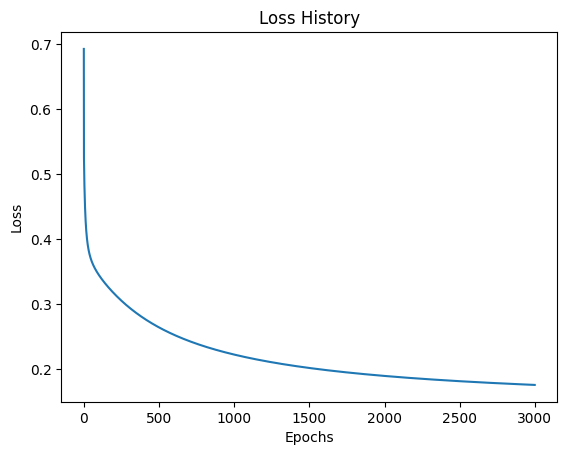

In [ ]:
print("Accuracy:", accuracy(y_test, y_pred))
print("\nClassification Report:")
print(classification_report_manual(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix_manual(y_test, y_pred))


# plot loss history
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss History')
plt.show()

## Multi-class Classification

### Making Synthetic Data

In [ ]:
import pandas as pd

import random

def generate_synthetic_data(num_rows=40):
    data = []

    for _ in range(num_rows):
        x1 = random.uniform(1, 8)
        x2 = random.uniform(1, 8)
        if x1 > 3 and x2 < 3:
          label = 0
        elif x1 < 5 and x2 > 5:
          label = 1
        elif x1 > 3 and x2 > 3:
          label = 2
        else:
          label = 3
        data.append([x1, x2, label])
    return data

data = generate_synthetic_data(40)

columns = ['x1', 'x2', 'y']

df = pd.DataFrame(data, columns=columns)

df.head()

,x1,x2,y
0,4.617187,3.500581,2
1,1.073840,3.783621,3
2,7.652747,7.626213,2
3,7.407422,2.209760,0
4,5.589951,3.345190,2


In [ ]:
# display count of each label
df['y'].value_counts()

,count
y,
0,14
2,11
1,8
3,7


### With Inbuilt Function

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[['x1','x2']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr_model = LogisticRegression(max_iter=100)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.50      0.67         2
           2       0.75      0.60      0.67         5
           3       1.00      1.00      1.00         1

    accuracy                           0.75        12
   macro avg       0.85      0.78      0.78        12
weighted avg       0.78      0.75      0.74        12


Confusion Matrix:
[[4 0 0 0]
 [0 1 1 0]
 [2 0 3 0]
 [0 0 0 1]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


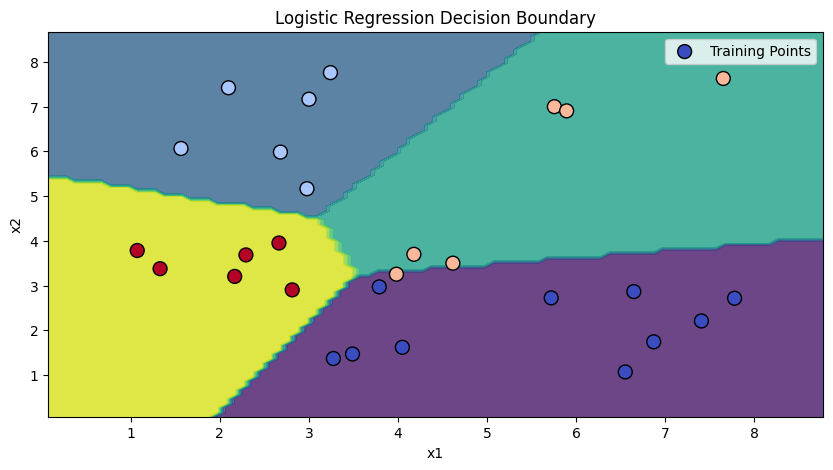

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

x_min, x_max = X_train['x1'].min() - 1, X_train['x1'].max() + 1
y_min, y_max = X_train['x2'].min() - 1, X_train['x2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = lr_model.predict(np.c_[xx.ravel(), yy.ravel()]) # ravel -> makes a linear array
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.8)
ax.scatter(X_train['x1'], X_train['x2'], c=y_train, edgecolors='k', marker='o', s=100, cmap='coolwarm', label="Training Points")
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Logistic Regression Decision Boundary')

plt.legend()
plt.show()

### Without using Inbuilt Function

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### Util Functions

In [ ]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def compute_loss(y, y_pred):
    m = len(y)
    log_likelihood = -np.log(y_pred[range(m), y])
    loss = np.sum(log_likelihood) / m
    return loss

def gradient_descent(X, y, lr=0.01, epochs=1000, num_classes=None):
    m, n = X.shape
    theta = np.zeros((n, num_classes))
    loss_history = []

    for _ in range(epochs):
        z = np.dot(X, theta)
        y_pred = softmax(z)

        y_one_hot = np.eye(num_classes)[y]

        gradient = np.dot(X.T, (y_pred - y_one_hot)) / m

        theta -= lr * gradient

        loss = compute_loss(y, y_pred)
        loss_history.append(loss)

    return theta, loss_history

def predict(X, theta):
    y_pred = softmax(np.dot(X, theta))
    return np.argmax(y_pred, axis=1) # maximum probability is returned

#### Confusion Matrix Calculation

In [ ]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def confusion_matrix_manual(y_true, y_pred, num_classes):
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for true, pred in zip(y_true, y_pred):
        cm[true, pred] += 1
    return cm

def classification_report_manual(y_true, y_pred, num_classes):
    cm = confusion_matrix_manual(y_true, y_pred, num_classes)

    # Calculate precision, recall, and f1-score for each class
    precision = np.diag(cm) / np.sum(cm, axis=0)  # column-wise
    recall = np.diag(cm) / np.sum(cm, axis=1)  # row-wise
    f1_score = 2 * (precision * recall) / (precision + recall)

    acc = accuracy(y_true, y_pred)

    report = f"Accuracy: {acc:.4f}\n"
    for i in range(num_classes):
        report += f"Class {i} - Precision: {precision[i]:.4f}, Recall: {recall[i]:.4f}, F1-Score: {f1_score[i]:.4f}\n"

    return report

#### Main Function

In [ ]:
df = pd.DataFrame(data, columns=columns)
X = df[['x1', 'x2']]
y = df['y'].values

num_classes = len(np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Add bias term (X0 = 1) to features
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

theta, loss_history = gradient_descent(X_train, y_train, lr=0.1, epochs=5000, num_classes=num_classes)

y_pred = predict(X_test, theta)

#### Plotting True and Predicted values

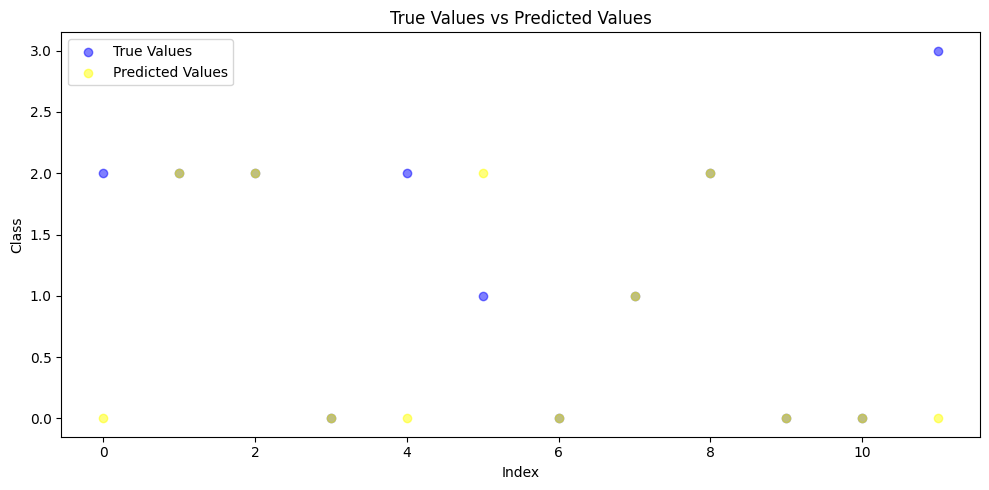

In [ ]:
plt.figure(figsize=(10, 5))

plt.scatter(range(len(y_test)), y_test, color='blue', label='True Values', alpha=0.5)
plt.scatter(range(len(y_pred)), y_pred, color='yellow', label='Predicted Values', alpha=0.5)
plt.title('True Values vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Class')
plt.legend()

plt.tight_layout()
plt.show()

#### Results

Accuracy: 0.6666666666666666

Classification Report:
Accuracy: 0.6667
Class 0 - Precision: 0.5714, Recall: 1.0000, F1-Score: 0.7273
Class 1 - Precision: 1.0000, Recall: 0.5000, F1-Score: 0.6667
Class 2 - Precision: 0.7500, Recall: 0.6000, F1-Score: 0.6667
Class 3 - Precision: nan, Recall: 0.0000, F1-Score: nan


Confusion Matrix:
[[4 0 0 0]
 [0 1 1 0]
 [2 0 3 0]
 [1 0 0 0]]


<ipython-input-26-545920caeea4>:14: RuntimeWarning: invalid value encountered in divide
  precision = np.diag(cm) / np.sum(cm, axis=0)  # column-wise


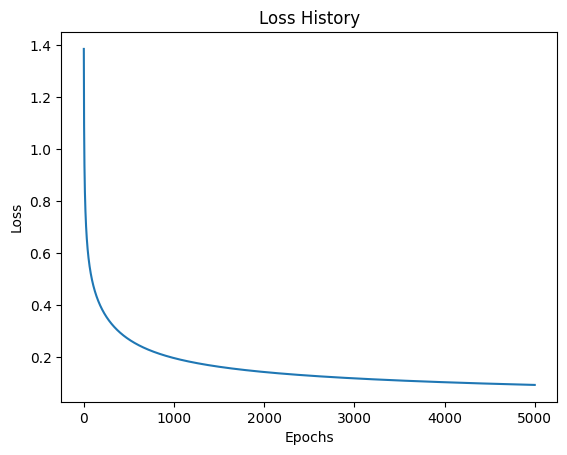

In [ ]:
print("Accuracy:", accuracy(y_test, y_pred))
print("\nClassification Report:")
print(classification_report_manual(y_test, y_pred, num_classes))
print("\nConfusion Matrix:")
print(confusion_matrix_manual(y_test, y_pred, num_classes))

# Plot loss history
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss History')
plt.show()